In [ ]:
'''
linear ,multiple aur polynomial regression ma aik best fit line milti ha mager support vector mam aik tube milti ha 
jo 

dummy variables pe feature scaling apply nhi karte q k wo categorical data ko represent kar rha hote ha in form of vector
aur binary per bhi nhi huti apply
feature scaling tab apply karni ha independent aut dependent variable different sccale per hute ha
apply feature scaling after train_test_split 


'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [16]:
#level ko x bnaya aur salary ko y
x=data.iloc[:,1:-1].values
y=data.iloc[:,-1].values

In [17]:
#x 2D array ha
x.shape

(10, 1)

In [18]:
#y aik 1D array ha
y.shape

(10,)

In [19]:
# y ko bhi x ki tarha 2Dbadalna k liye reshape karege

y = y.reshape(len(y),1)

In [21]:
y.shape

(10, 1)

In [22]:
from sklearn.preprocessing import StandardScaler
sc_x=StandardScaler()
sc_y=StandardScaler()

In [28]:
#yha fit mean aur median values nikalega aur transform update karega new values ko x ma
x=sc_x.fit_transform(x)
y=sc_y.fit_transform(y)

In [29]:
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [30]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [34]:
#model bnana k liye 
from sklearn.svm import SVR
reg=SVR(kernel='rbf')        #rbf non linear kernel ha q k data hmara no linear ha
reg.fit(x,y)

# different type k kernels hute ha inki documentation dekho

C:\Users\Talha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

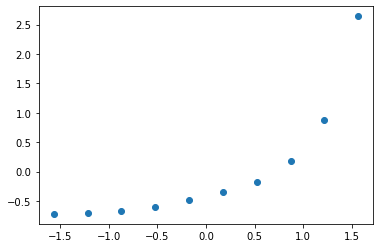

In [35]:
plt.scatter(x,y)

In [39]:
# hmara scale badal chuka ha  tu 6.5 per value predict karna k liye usko bhi usi level per lejao transform se 
#phr jo answer ayega wo bhi usi scale ka hoga so usko normal karna k liye inverse transform lagana ha ab normal shoe hugi


y_pred=sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])).reshape(-1,1))

In [40]:
y_pred

array([[0.01150915]])

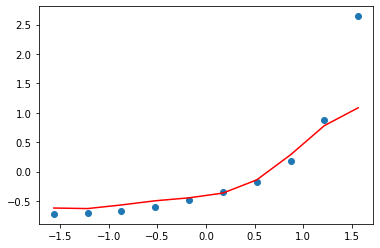

In [43]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(reg.predict(x)),color='red')